In [27]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [34]:
# Define the path to the CSV file
csv_file_path = "../../Jazzer_surf/3d_predictions/chimeras/test/interactions_all_files.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# take only the rows where the resn is MG and the interacting_resn is ATP or ADP and the column file is a_atp_mg or a_adp_mg
df = df[(df['resn'] == 'MG') & ((df['interacting_resn'] == 'ATP') | (df['interacting_resn'] == 'ADP')) & ((df['file'] == 'a_atp_mg_tub') )]

# order the dataframe by the column interacting_atom but in the order PA, O1A, O2A, O3A, PB, O1B, O2B, O3B, PG, O1G, O2G, O3G
df = df.sort_values(by='interacting_atom', key=lambda x: x.map({'PA':1, 'O1A':2, 'O2A':3, 'O3A':4, 'PB':5, 'O1B':6, 'O2B':7, 'O3B':8, 'PG':9, 'O2G':10, 'O1G':11, 'O3G':12}))

df

,file,chain,resi,resn,atom_name,interacting_atom,interacting_resn,interacting_chain,distance (angstroms),residue_one_letter,full_atom_name,interacting_full_atom_name
2664,a_atp_mg_tub,H,1,MG,MG,PA,ATP,F,4.481044,?,Magnesium,Phosphorus alpha
486,a_atp_mg_tub,G,1,MG,MG,PA,ATP,E,4.614748,?,Magnesium,Phosphorus alpha
2615,a_atp_mg_tub,H,1,MG,MG,O1A,ATP,F,4.012681,?,Magnesium,Oxygen 1 alpha
2222,a_atp_mg_tub,G,1,MG,MG,O1A,ATP,E,4.365795,?,Magnesium,Oxygen 1 alpha
1954,a_atp_mg_tub,H,1,MG,MG,O2A,ATP,F,4.630960,?,Magnesium,Oxygen 2 alpha
44,a_atp_mg_tub,G,1,MG,MG,O3A,ATP,E,3.771675,?,Magnesium,Oxygen 3 alpha
2656,a_atp_mg_tub,H,1,MG,MG,O3A,ATP,F,4.228962,?,Magnesium,Oxygen 3 alpha
453,a_atp_mg_tub,G,1,MG,MG,PB,ATP,E,3.183059,?,Magnesium,Phosphorus beta
545,a_atp_mg_tub,H,1,MG,MG,PB,ATP,F,3.211626,?,Magnesium,Phosphorus beta
2828,a_atp_mg_tub,H,1,MG,MG,O1B,ATP,F,2.011582,?,Magnesium,Oxygen 1 beta


In [33]:
glob.glob("../../Jazzer_surf/3d_predictions/chimeras/test/*.cif")

['../../Jazzer_surf/3d_predictions/chimeras/test/a_atp_mg_tub.cif']

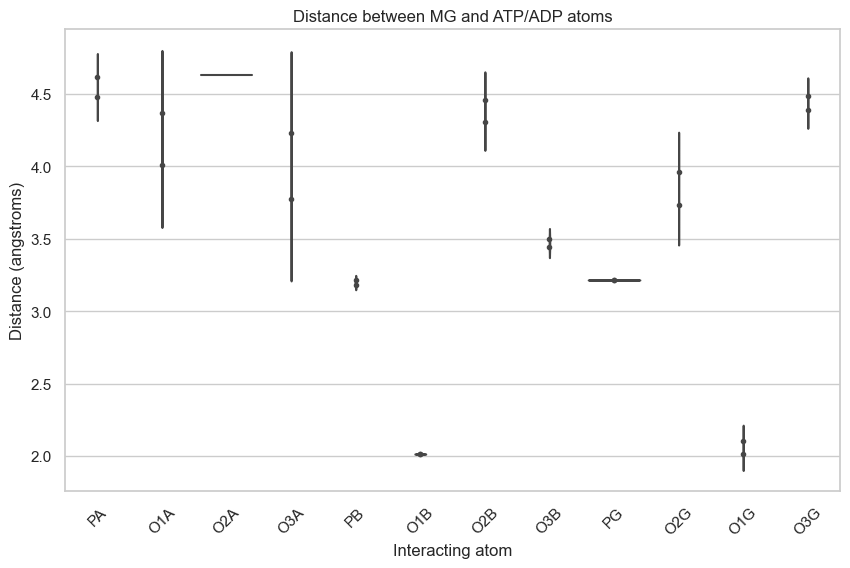

In [35]:

# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x='interacting_atom', y='distance (angstroms)', data=df, ax=ax, inner='point')

# Set the title of the plot
plt.title('Distance between MG and ATP/ADP atoms')

# Set the x-axis label
plt.xlabel('Interacting atom')

# Set the y-axis label
plt.ylabel('Distance (angstroms)')
plt.xticks(rotation=45)
# Show the plot
plt.show()


In [67]:
import pandas as pd
import plotly.express as px

# Define the path to the CSV file
csv_file_path = "../../Jazzer_surf/3d_predictions/chimeras/test/interactions_all_files.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Take only the rows where the resn is MG and the interacting_resn is ATP or ADP
df = df[(df['resn'] == 'MG') & ((df['interacting_resn'] == 'ADP') | (df['interacting_resn'] == 'ATP'))]

# Order the DataFrame by the column interacting_atom but in the order PA, O1A, O2A, O3A, PB, O1B, O2B, O3B, PG, O1G, O2G, O3G
atom_order = ['PA', 'O1A', 'O2A', 'O3A', 'PB', 'O1B', 'O2B', 'O3B', 'PG', 'O2G', 'O1G', 'O3G']
df['atom_order'] = pd.Categorical(df['interacting_atom'], categories=atom_order, ordered=True)
df = df.sort_values(by='atom_order')

# Create an interactive strip plot using Plotly
fig = px.strip(df, x='interacting_atom', y='distance (angstroms)', color='file',
               category_orders={"interacting_atom": atom_order},
               title='Distance between MG and ATP/ADP atoms',
               labels={'interacting_atom': 'Interacting atom', 'distance (angstroms)': 'Distance (angstroms)'},
               hover_data=['file'])

# Update the layout to fix the y-axis and ensure all x-axis values are shown
fig.update_layout(
    legend_title_text='File',
    legend=dict(
        title=dict(text='File'),
        itemsizing='constant'
    ),
    xaxis_title='Interacting atom',
    yaxis_title='Distance (angstroms)',
    yaxis=dict(range=[0, 5]),
    xaxis=dict(categoryorder='array', categoryarray=atom_order)
)

# Show the plot
fig.show()


In [68]:
# Define the path to the CSV file
csv_file_path = "../../Jazzer_surf/3d_predictions/chimeras/test/interactions_all_files.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df = df.loc[df.groupby(['file', 'chain', 'resi', 'resn', 'interacting_chain', 'interacting_resn'])['distance (angstroms)'].idxmin()]

# combine the "resi" and "residue_one_letter" into a new column called "residue"
df['residue'] = df['resi'].astype(str) + df['residue_one_letter']

df.head()

,file,chain,resi,resn,atom_name,interacting_atom,interacting_resn,interacting_chain,distance (angstroms),residue_one_letter,full_atom_name,interacting_full_atom_name,residue
19,a_atp_mg_tub,A,18,ARG,NH2,N6,ATP,F,3.747399,R,Nitrogen eta 2,Nitrogen 6,18R
20,a_atp_mg_tub,A,19,PHE,O,N6,ATP,F,4.504910,F,Oxygen,Nitrogen 6,19F
21,a_atp_mg_tub,A,20,ARG,CB,N7,ATP,F,3.449845,R,Carbon beta,Nitrogen 7,20R
30,a_atp_mg_tub,A,21,PRO,CD,N1,ATP,F,3.234430,P,Carbon delta,Nitrogen 1,21P
162,a_atp_mg_tub,A,51,LYS,CE,OE1,GLU,D,4.791676,K,Carbon epsilon,Oxygen epsilon 1,51K


In [69]:
#df loc of chain A with chain C and file a_atp_mg
df = df[(df['chain'] == 'A') & (df['interacting_chain'] == 'C') & (df['file'] == 'a_atp_mg')]

df['residue'].values

array([], dtype=object)

In [73]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CDSView, BooleanFilter
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10, Category20

# Enable Bokeh output in the notebook
output_notebook()

# Define the path to the CSV file
csv_file_path = "../../Jazzer_surf/3d_predictions/chimeras/test/interactions_all_files.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Filter to get the shortest distances for each interaction
df = df.loc[df[df['chain'] == 'A'].groupby(['resi', 'interacting_chain'])['distance (angstroms)'].idxmin()]

# Exclude interactions with Mg and chain letters A, G, H
df = df[(df['interacting_resn'] != 'MG') & (~df['interacting_chain'].isin(['A', 'G', 'H']))]

# Map interacting_resn to single-letter codes for better readability
aa_dict = {
    'ALA': 'A', 'ARG': 'R', 'ASN': 'N', 'ASP': 'D', 'CYS': 'C', 'GLN': 'Q', 'GLU': 'E', 'GLY': 'G',
    'HIS': 'H', 'ILE': 'I', 'LEU': 'L', 'LYS': 'K', 'MET': 'M', 'PHE': 'F', 'PRO': 'P', 'SER': 'S',
    'THR': 'T', 'TRP': 'W', 'TYR': 'Y', 'VAL': 'V'
}
df['residue_one_letter'] = df['resn'].map(aa_dict)
df['residue'] = df['resi'].astype(str) + df['residue_one_letter']

# Replace chain letters with descriptive names
chain_map = {
    'B': 'kinesin B',
    'C': 'alpha-tubulin',
    'D': 'beta-tubulin',
    'E': 'ATP',
    'F': 'ATP'
}
df['interacting_chain'] = df['interacting_chain'].map(chain_map)

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create a color map for interacting chains
unique_interacting_chains = df['interacting_chain'].unique()
palette = Category10[10] if len(unique_interacting_chains) <= 10 else Category20[20]
color_map = factor_cmap('interacting_chain', palette=palette, factors=unique_interacting_chains)

# Create the figure
p = figure(width=900, height=600, title="Distance between MG and ATP/ADP atoms by amino acid position",
           x_axis_label="Residue Index", y_axis_label="Distance (angstroms)", x_range=(0, 401), y_range=(0, 5.25))

# Add scatter plot with views for each chain
for chain in unique_interacting_chains:
    bool_filter = BooleanFilter([x == chain for x in df['interacting_chain']])
    view = CDSView(source=source, filters=[bool_filter])
    scatter = p.scatter(x='resi', y='distance (angstroms)', source=source, size=10, color=color_map, alpha=0.6, legend_label=chain, view=view)

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ('Resi', '@residue'),
    ('Distance', '@{distance (angstroms)}{0.2f} Å'),
    ('Chain', '@chain'),
    ('Interacting Chain', '@interacting_chain'),
    ('Interacting Resn', '@interacting_resn'),
    ('interacting atom', '@interacting_full_atom_name)
]
p.add_tools(hover)

# Add labels
labels = p.text(x='resi', y='distance (angstroms)', text='residue_one_letter', source=source, text_align='center', text_baseline='middle', text_font_size='10pt')

# Customize legend
p.legend.title = 'Interacting Chain'
p.legend.location = 'bottom_right'
p.legend.click_policy = 'mute'

# Show the plot
show(p)


Loading BokehJS ...

/var/folders/_h/zqzyskvx2hd4w984syj7bb3m0000gn/T/ipykernel_67275/3851601058.py:57: BokehDeprecationWarning:

CDSView.source is no longer needed, and is now ignored. In a future release, passing source will result an error.

/var/folders/_h/zqzyskvx2hd4w984syj7bb3m0000gn/T/ipykernel_67275/3851601058.py:57: BokehDeprecationWarning:

CDSView.filters was deprecated in bokeh 3.0. Use CDSView.filter instead.

/var/folders/_h/zqzyskvx2hd4w984syj7bb3m0000gn/T/ipykernel_67275/3851601058.py:57: BokehDeprecationWarning:

CDSView.source is no longer needed, and is now ignored. In a future release, passing source will result an error.

/var/folders/_h/zqzyskvx2hd4w984syj7bb3m0000gn/T/ipykernel_67275/3851601058.py:57: BokehDeprecationWarning:

CDSView.filters was deprecated in bokeh 3.0. Use CDSView.filter instead.

/var/folders/_h/zqzyskvx2hd4w984syj7bb3m0000gn/T/ipykernel_67275/3851601058.py:57: BokehDeprecationWarning:

CDSView.source is no longer needed, and is now ignored. In a future release, 

In [65]:
df

,file,chain,resi,resn,atom_name,interacting_atom,interacting_resn,interacting_chain,distance (angstroms),residue_one_letter,full_atom_name,interacting_full_atom_name,residue
2147,a_atp_mg_tub,A,18,ARG,NH2,N6,ATP,ATP,3.747399,R,Nitrogen eta 2,Nitrogen 6,18R
2450,a_atp_mg_tub,A,19,PHE,O,N6,ATP,ATP,4.504910,F,Oxygen,Nitrogen 6,19F
2117,a_atp_mg_tub,A,20,ARG,CB,N7,ATP,ATP,3.449845,R,Carbon beta,Nitrogen 7,20R
1797,a_atp_mg_tub,A,21,PRO,CD,N1,ATP,ATP,3.234430,P,Carbon delta,Nitrogen 1,21P
591,a_atp_mg_tub,A,51,LYS,CE,OE1,GLU,beta-tubulin,4.791676,K,Carbon epsilon,Oxygen epsilon 1,51K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,a_atp_mg_tub,G,1,MG,MG,CG,GLU,alpha-tubulin,4.471117,NaN,Magnesium,Carbon gamma,1?
2824,a_atp_mg_tub,G,1,MG,MG,OG1,THR,alpha-tubulin,4.817270,NaN,Magnesium,Oxygen gamma 1,1?
1907,a_atp_mg_tub,G,1,MG,MG,NZ,LYS,beta-tubulin,4.050508,NaN,Magnesium,Nitrogen zeta,1?
325,a_atp_mg_tub,G,1,MG,MG,O1B,ATP,ATP,2.014655,NaN,Magnesium,Oxygen 1 beta,1?
